# 监督学习supervision_learn

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
import numpy as np

x = pd.DataFrame([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1, 2, 19, 4, 5, 7, 7,1 , 9, 10]]).T
y = pd.DataFrame([1, 89, 3, 4, 5, 6, 7, 8, 9, 10])

print(x)

## 1、逻辑回归（logistic Regression）

    0   1
0   1   1
1   2   2
2   3  19
3   4   4
4   5   5
5   6   7
6   7   7
7   8   1
8   9   9
9  10  10
均方差： 774.5
R2: -0.2321814942089857
准确率： 0.8


C:\Users\38473\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\38473\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


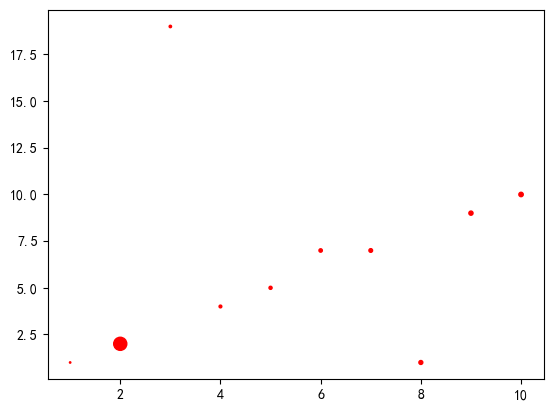

In [6]:

l_model = LogisticRegression()
l_model.fit(x, y)
y_predict = l_model.predict(x)

print("均方差：",mean_squared_error(y,y_predict))
print("R2:",r2_score(y,y_predict))
print("准确率：",accuracy_score(y,y_predict))

# %matplotlib inline

# plt.plot(x,y_predict)
plt.scatter(x[0],x[1],y,c = "r")
# plt.show()


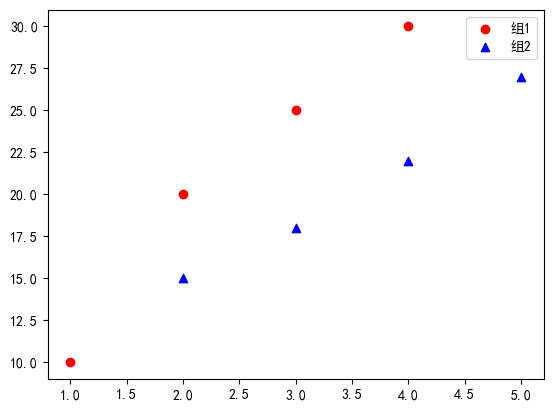

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负

# 示例数据
x1 = [1, 2, 3, 4]
y1 = [10, 20, 25, 30]
x2 = [2, 3, 4, 5]
y2 = [15, 18, 22, 27]

plt.scatter(x1, y1, marker='o', color='r', label='组1')  # 圆形
plt.scatter(x2, y2, marker='^', color='b', label='组2')  # 三角形

plt.legend()
plt.show()


    A   B  Result
0  51  69       1
1  92  71       1
2  14  26       0
3  71   8       0
4  60  61       1
5  20  36       0
6  82  96       1
7  86  50       1
8  74  43       1
9  74  23       0


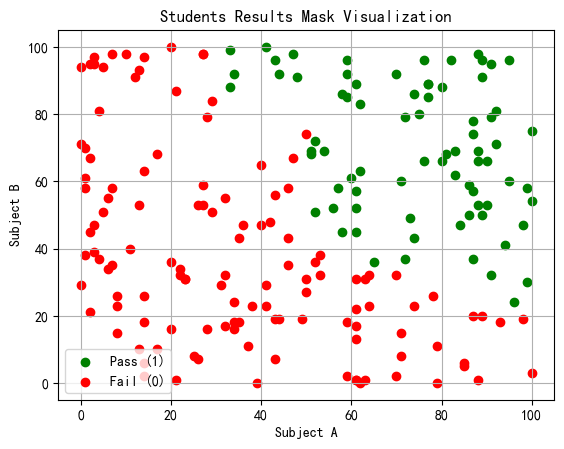

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(42)  # 固定随机种子，保证结果可重复
A = np.random.randint(0, 101, size=200)  # 科目A通过情况
B = np.random.randint(0, 101, size=200)  # 科目B通过情况

# 定义总通过规则：A和B都为1才算通过
Result = (A > 30) & (B > 80) | (A * B > 2300)&(A>50).astype(int)

# 合并数据
data = np.column_stack((A, B, Result))

# 转换为DataFrame便于查看
df = pd.DataFrame(data, columns=["A", "B", "Result"])
print(df.head(10))  # 打印前10行
df.to_csv("student_results.csv", index=False)

# ====== 可视化：mask遮罩 ======
mask_pass = df["Result"] == 1
mask_fail = df["Result"] == 0

plt.scatter(df.loc[mask_pass, "A"], df.loc[mask_pass, "B"], c="g", label="Pass (1)")
plt.scatter(df.loc[mask_fail, "A"], df.loc[mask_fail, "B"], c="r", label="Fail (0)")

plt.xlabel("Subject A")
plt.ylabel("Subject B")
plt.title("Students Results Mask Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [59]:
LR_model = LogisticRegression()
LR_model.fit(df[["A", "B"]], df["Result"])
result_predict = LR_model.predict(df[["A", "B"]])
print("准确率：",accuracy_score(df["Result"], result_predict))




准确率： 0.94


In [60]:
print(LR_model.predict([[80, 80]]))

[1]


C:\Users\38473\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
theta0 = LR_model.intercept_
theta1 = LR_model.coef_[0][0]
theta2 = LR_model.coef_[0][1]
print(theta0,theta1,theta2)


[-19.80317693] 0.1901016833396252 0.1589774055105175


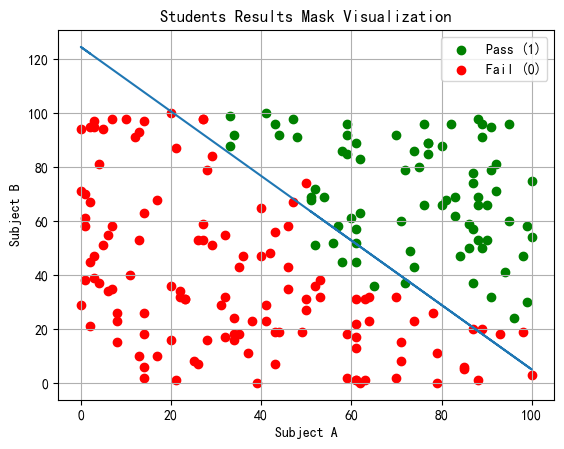

In [62]:

x2 = -(theta0+theta1*df["A"])/theta2

plt.plot(df["A"],x2)
plt.scatter(df.loc[mask_pass, "A"], df.loc[mask_pass, "B"], c="g", label="Pass (1)")
plt.scatter(df.loc[mask_fail, "A"], df.loc[mask_fail, "B"], c="r", label="Fail (0)")

plt.xlabel("Subject A")
plt.ylabel("Subject B")
plt.title("Students Results Mask Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [71]:
AA = df["A"]*df["A"]
BB = df["B"]*df["B"]
AB = df["A"]*df["B"]

second_data = pd.DataFrame(np.column_stack((df["A"],df["B"],AA, BB, AB)), columns=["A","B","AA", "BB", "AB"])
print(second_data.head())

    A   B    AA    BB    AB
0  51  69  2601  4761  3519
1  92  71  8464  5041  6532
2  14  26   196   676   364
3  71   8  5041    64   568
4  60  61  3600  3721  3660


In [72]:
LR_model.fit(second_data, df["Result"])
print("准确率：",accuracy_score(df["Result"], LR_model.predict(second_data)))

准确率： 0.975


C:\Users\38473\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### get各项系数

In [160]:
import sympy as sp

second_theta0 = LR_model.intercept_
[second_theta1,second_theta2,second_theta3,second_theta4,second_theta5] = LR_model.coef_[0]

print(second_theta1)
# print(second_theta0,second_theta1,second_theta2,second_theta3,second_theta4,second_theta5)

0.18552483755825172


### 方法一：使用sympy库，实现直接由隐函数求解另一个未知数的值 `x2_predict`
 优点是程序求解，无需手动计算，整体消耗时间较少

 缺点是程序运行时间长，

In [192]:
import sympy as sp

second_theta0 = LR_model.intercept_
[second_theta1,second_theta2,second_theta3,second_theta4,second_theta5] = LR_model.coef_[0]


a , b = sp.symbols("A B")
expr = second_theta0[0]+second_theta1*a+second_theta2*b+second_theta5*a*b+second_theta3*a*a+second_theta4*b*b
solutions = sp.solve(expr, b)
B_predict = pd.DataFrame([solutions[1].subs(a, a_real) for a_real in df["A"]])

print(B_predict.head)

x2_predict = B_predict.loc[:,1] # 二次方程的两个解，选取其中的大于0的一个

<bound method NDFrame.head of                     0
0    53.4771197386276
1    23.7729044055116
2    182.564506305308
3    33.8911242298706
4    42.8979835311759
..                ...
195  323.038575469975
196  115.238460660763
197  41.9261833936548
198  30.8024338765698
199  298.196448823406

[200 rows x 1 columns]>


KeyError: 1

### 方法二：使用手动求解出显式函数表达式，然后编写代码，最后再代入的方式求解另一个未知数 `x2_predict`
#### 优点是程序运行时间短，但需要手动计算显示函数表达式

In [165]:

a= second_theta4
b= second_theta5*df["A"]+second_theta2
c = second_theta0+second_theta1*df["A"]+second_theta3*df["A"]*df["A"]
x2_predict = (-b+np.sqrt(b*b-4*a*c))/(2*a)

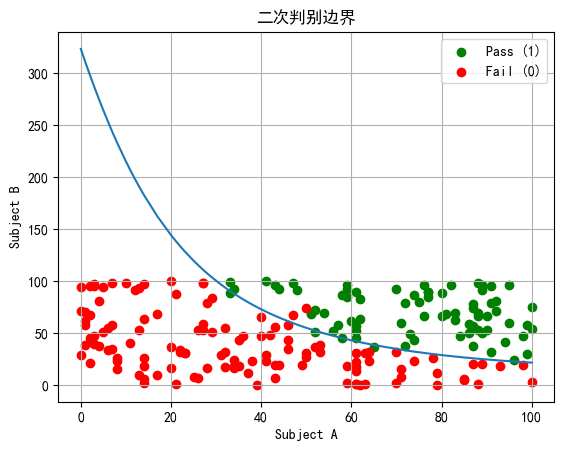

In [193]:


idx = df["A"].argsort()
A_sorted = df["A"].values[idx]
x2_predict_sorted = x2_predict.values[idx] if hasattr(x2_predict, 'values') else x2_predict[idx]

plt.plot(A_sorted, x2_predict_sorted)

plt.scatter(df.loc[mask_pass, "A"], df.loc[mask_pass, "B"], c="g", label="Pass (1)")
plt.scatter(df.loc[mask_fail, "A"], df.loc[mask_fail, "B"], c="r", label="Fail (0)")

plt.xlabel("Subject A")
plt.ylabel("Subject B")
plt.title("Students Results Mask Visualization")
plt.legend()
plt.grid(True)

plt.title("二次判别边界")
plt.show()

In [94]:
import sympy as sp

# 定义符号
A, x = sp.symbols("A x")

# 假设这些是你模型里算出来的系数
a = sp.symbols("a")
b = sp.symbols("b")
c = sp.symbols("c")

# 构造隐式方程: a*x^2 + b*x + c = 0
expr = a*x**2 + b*x + c

# 解出 x 的显式表达式
solutions = sp.solve(expr, x)
print("显式解:", solutions)

# ===== 代入数值 =====
# 比如你已经有了数值 a,b,c (从LR系数里算的)
a_val = 2
b_val = -5
c_val = 3

solutions_num = [sol.subs({a:a_val, b:b_val, c:c_val}) for sol in solutions]
print("数值解:", solutions_num)


显式解: [(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]
数值解: [1, 3/2]


## 2、来自ai的原生二阶逻辑回归
并不是通过自己重构二阶特征

C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: G

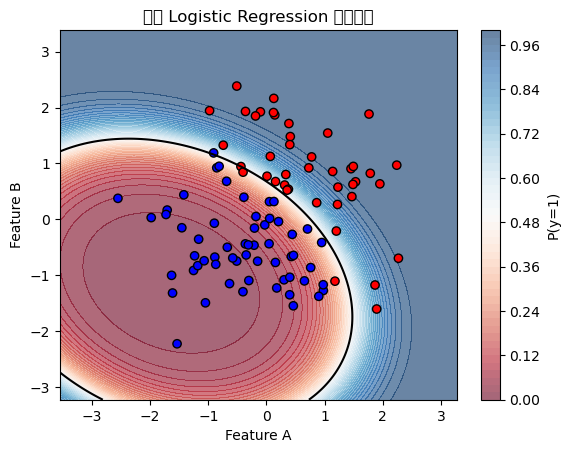

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# 构造示例数据 (A, B 两个特征，y 是否通过)
np.random.seed(0)
A = np.random.randn(100)
B = np.random.randn(100)
y = (A**3 + B > 0.5).astype(int)  # 人为设置一个非线性分类边界

X = np.vstack([A, B]).T

# ===== 特征扩展：二阶 =====
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# ===== 训练 Logistic Regression =====
clf = LogisticRegression()
clf.fit(X_poly, y)

# ===== 绘制决策边界 =====
xx, yy = np.meshgrid(np.linspace(A.min()-1, A.max()+1, 200),
                     np.linspace(B.min()-1, B.max()+1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)

# 预测概率
proba = clf.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, proba, levels=50, cmap="RdBu", alpha=0.6)
plt.colorbar(label="P(y=1)")

# 决策边界 0.5
plt.contour(xx, yy, proba, levels=[0.5], colors="k")

# 原始数据点
plt.scatter(A, B, c=y, edgecolors="k", cmap="bwr")
plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.title("二阶 Logistic Regression 决策边界")
plt.show()


In [93]:
print(accuracy_score(y, clf.predict(X_poly)))

0.97


## 3、决策树（decision tree）


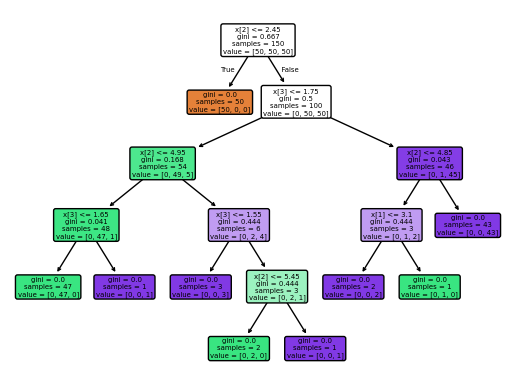

In [13]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree


import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# print(accuracy_score(y, clf.predict(X)))

# tree.plot_tree(clf)

plot_tree(clf,
          # feature_names=['x1', 'x2', 'x3'],  # 替换为您的特征名
          # class_names=['Class 0', 'Class 1'],  # 替换为您的类别名
          filled=True,  # 填充节点颜色
          rounded=True,  # 圆角节点
          fontsize=5)
plt.show()

In [11]:
print(df)

NameError: name 'df' is not defined

# 这里是监督<mark>降维</mark>（supervised dimensionality reduciotn）
并不是监督式学习，相当于前期的数据处理，但是可能篇幅会比较小，所以就放在监督式学习的后面，因为都需要特征标注
## <mark>LDA</mark> 线性判别分析（linear discriminant analysis）

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

X, y = load_iris(return_X_y=True)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

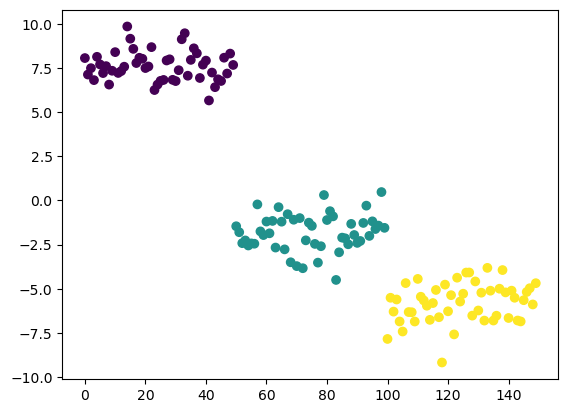

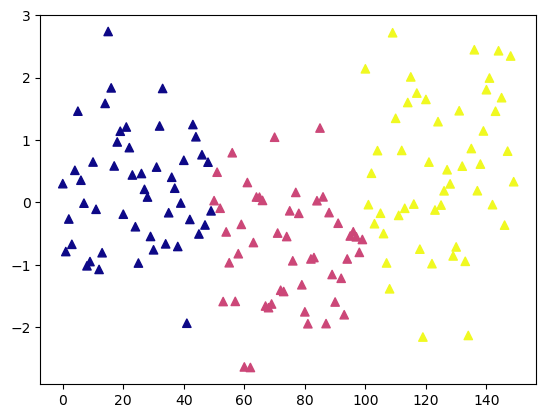

In [31]:
plt.scatter(pd.DataFrame(range(150)),
            X_lda[:, 0],
            c=y,
            cmap='viridis',    # 设定第一个颜色映射
            label='LDA Component 0')
plt.show()
# 绘制第二个散点图：使用 'plasma' 颜色映射
# 注意：两个图的点重叠了，使用不同的 marker 更利于观察
plt.scatter(pd.DataFrame(range(150)),
            X_lda[:, 1],
            c=y,
            cmap='plasma',     # 设定第二个颜色映射
            marker='^',        # 使用三角形标记来区分
            label='LDA Component 1')

plt.show()

In [ ]:

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
for j in range(150): # 绘制数据点
    plt.text(j, X[j,i], str(j), fontsize=10, color='black', ha='center', va='bottom')


plt.title("LDA projection")
plt.show()

# 特征选择(feature importance)
直接用模型去“评估”每个特征的重要性，而不是纯几何变换

使用 RandomForestClassifier随机森林分类器<mark>（后续学习一下，为什么就可以评估特征的重要性）</mark>、XGBoost 或 LogisticRegression

计算每个特征的 feature_importances_ 或 coef_

选出贡献最大的特征

In [32]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier()
clf.fit(X, y)
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print(sorted_indices)


[3 2 0 1]


## 和经典的无监督式学习PCA做个对比

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

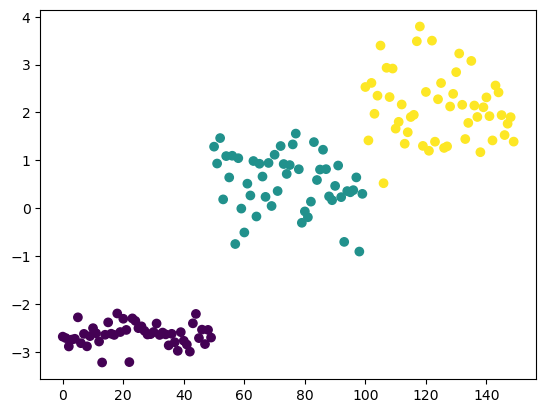

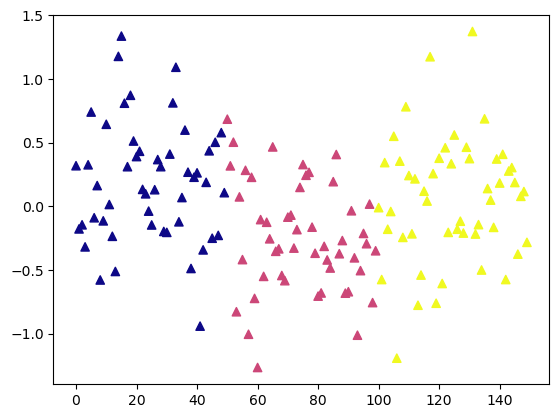

In [30]:
plt.scatter(pd.DataFrame(range(150)),
            X_pca[:, 0],
            c=y,
            cmap='viridis',    # 设定第一个颜色映射
            label='LDA Component 0')
plt.show()
# 绘制第二个散点图：使用 'plasma' 颜色映射
# 注意：两个图的点重叠了，使用不同的 marker 更利于观察
plt.scatter(pd.DataFrame(range(150)),
            X_pca[:, 1],
            c=y,
            cmap='plasma',     # 设定第二个颜色映射
            marker='^',        # 使用三角形标记来区分
            label='LDA Component 1')
plt.show()


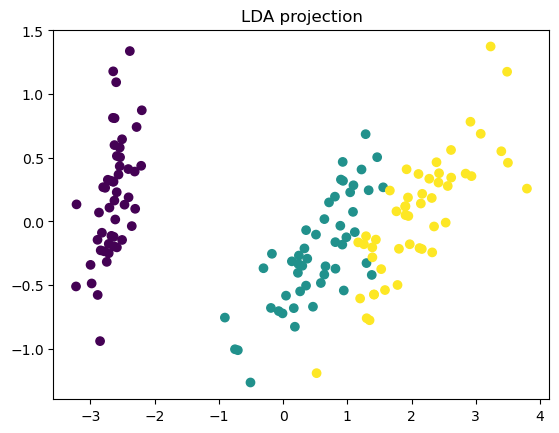

In [19]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("LDA projection")
plt.show()